# Overlord AI
For information about this project, see [this README.md](../doc/README.md)


## TODO:

* [x] notebook source list
* [x] notebook downloads
* [ ] dataset downloads
* [ ] dataset processing
* [ ] model training

# CODE STARTS HERE

First we import all the libraries and whatnot

# imports


In [115]:
import requests
import pandas as pd
import numpy as np
import pylab as pyl
import matplotlib.pyplot as plt
import os
import re

# definitions

I added an optional download for the used workbooks so you have them saved locally for when you want to use them. When set to True, all the models will be downloaded to ../data/.models/

In [116]:
useScrapedCsv = True
downloadWorkbooks = False
downloadDatasets = False

# reading data


## data gathering

In [117]:
df = pd.DataFrame([], columns=[
                  'index', 'link', 'requeststatus', 'content'])
sourcelist = pd.read_csv("../data/models/sources.csv")                  
index = 0
    
if(useScrapedCsv):
    df = pd.read_csv("kaggleScrape.csv")
else:
    # print(sourcelist)
    for item in sourcelist['Sources']:  # loop through sources
        r = requests.get(item)  # get the html data

    # add data to the df
        new_row = [index, item, r.status_code, r.text]
        df.loc[index] = new_row
        index += 1
if (downloadWorkbooks and not useScrapedCsv):
    for item in sourcelist['Sources']:
        # download the workbooks
        print(index)
        kagglelink = item.replace('https://www.kaggle.com/code/', "")
        dirname = kagglelink.split("/")[1]
        command = "kaggle k pull " + kagglelink + " -p ../data/.models/"+dirname+"/src/"
        print(command)
        #os.system('%s' % command)
        index += 1
print("data gathered")

data gathered


### get dataset link

In [118]:
for index, row in df.iterrows():
    print(index)
    # print(row['content'])
    iter =0
    index2=0
    for iter in range(200):
        dataSourceUrl = re.findall("\"dataSourceUrl\"\:.{%d}\"thumbnailUrl\""%iter, row['content'])
        if(dataSourceUrl):
            #print("Dataset Url: %s"%dataSourceUrl)
            for source in dataSourceUrl:
                sourceClean = re.split(':|,|"', source)[4]
                df.loc[df['index'] == index, 'dataSourceUrl%d'%index2] = str(sourceClean)
                #print("Dataset Url: %s"%sourceClean)
                if(downloadDatasets and not useScrapedCsv):
                    sourceSplit = sourceClean.split('/', maxsplit=2)
                    if(sourceSplit[1]=='datasets'):
                        command = "kaggle datasets download -d " + sourceSplit[2] + " -p ../data/.models/"+str(dirname)+"input/"
                        print(command)
                        #os.system('%s' % command)
                    if(sourceSplit[1]=='competitions'):
                        command = "kaggle datasets download -d " + sourceSplit[2] + " -p ../data/.models/"+str(dirname)+"input/"
                        print(command)
                        #os.system('%s' % command)
                    if(sourceSplit[1]=='kaggle'):
                        print("no dataset")
                    #print(sourceSplit)
                    # command = "kaggle datasets download -d " + sourceClean + " -p ../data/.models/"+str(dirname)+"input/"
                    # print(command)
                    #os.system('%s' % command)
                index2 +=1
if(downloadDatasets and not useScrapedCsv):
    print("Finished downloading datasets")
else:
    print("Skipped downloading datasets")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
Skipped downloading datasets


### get dataset

In [119]:

# from logging import exception

# #TODO YEET ALL THIS IN DATASET GATHERING

# def isNaN(string):
#         return string != string
# successful =0
# failed = 0
# if (downloadDatasets):
#         for index,  row in df.iterrows():
#                 print(index)
#                 kagglelink = str(df.loc[df['index'] == index, 'link'].replace('https://www.kaggle.com/code/', ""))
#                 #print("ASDF %s"%kagglelink)
#                 #print (type(datalink))
#                 dirname = kagglelink.split("/")[1]
#                 # download the dataset
#                 try:
#                         for sourceCount in range(3):
#                                 datalink = df.loc[df['index'] == index, 'dataSourceUrl%d'%sourceCount]
#                                 #print(type(datalink))
#                                 #print(datalink)
#                                 if(type(datalink[0])!=float):
#                                         #kagglelink = str(df.loc[df['index'] == index, 'dataSourceUrl%d'%sourceCount].replace('https://www.kaggle.com/code/', ""))
#                                         #print("AAAAAAAAAAAAAAAAAAa")
#                                         #print(type(datalink[0]))
#                                         print(datalink[0])
#                                         command = "kaggle datasets download -d " + str(datalink[0]) + " -p ../data/.models/"+str(dirname)+"input/"
#                                         print(command)
#                                         #os.system('%s' % command)
#                                         successful+=1
#                 except:
#                         #print(type(datalink[0]))
#                         #print(datalink[0])
#                         print(exception)
#                         failed +=1   
#         print("________________________________________")
#         print("%d dataset(s) downloaded successfully"%successful)
#         print("%d dataset(s) failed to download"%failed)
#         print("%d total dataset(s)"%(successful+failed))
# else:
#         print("skipped dataset downloading")                     

## transform data

### get execution time

In [120]:
# html parsing
# grep -ioe "runtimeseconds\"\:[0-9]*\.[0-9]*" # grep to extract the run time form html
for index, row in df.iterrows():
    print(index)
    # print(row['content'])
    runTime = float(re.split(":", re.findall(
        "\"runTimeSeconds\"\:[0-9]+\.[0-9]+", row['content'])[0])[1])
    print("runtime in seconds: %f"%runTime)
    df.loc[df['index'] == index, 'runTime'] = runTime


0
runtime in seconds: 861.112981
1
runtime in seconds: 1206.104310
2
runtime in seconds: 20.786203
3
runtime in seconds: 386.320938
4
runtime in seconds: 22.583234
5
runtime in seconds: 48.534224
6
runtime in seconds: 49.849152
7
runtime in seconds: 2790.507509
8
runtime in seconds: 5754.205438
9
runtime in seconds: 10.160655
10
runtime in seconds: 3534.495725
11
runtime in seconds: 1225.858824
12
runtime in seconds: 8293.278067
13
runtime in seconds: 392.470415
14
runtime in seconds: 13.538386
15
runtime in seconds: 2393.242585
16
runtime in seconds: 1938.983198
17
runtime in seconds: 27493.298228
18
runtime in seconds: 420.714699
19
runtime in seconds: 2261.530650
20
runtime in seconds: 9470.128878
21
runtime in seconds: 1781.179535
22
runtime in seconds: 10.234019
23
runtime in seconds: 172.335391
24
runtime in seconds: 8576.872956
25
runtime in seconds: 1857.792243
26
runtime in seconds: 765.167640
27
runtime in seconds: 3906.924834
28
runtime in seconds: 34.706060
29
runtime in se

### get upvotes

In [121]:
# html parsing
# grep -ioe "runtimeseconds\"\:[0-9]*\.[0-9]*" # grep to extract the run time form html
for index, row in df.iterrows():
    print(index)
    # print(row['content'])
    upvoteCount = int(re.split(":", re.findall(
        "\"upvoteCount\"\:[0-9]+", row['content'])[0])[1])
    print("upvotes: %d"%upvoteCount)
    df.loc[df['index'] == index, 'upvoteCount'] = upvoteCount


0
upvotes: 4198
1
upvotes: 3346
2
upvotes: 2690
3
upvotes: 2496
4
upvotes: 2304
5
upvotes: 2256
6
upvotes: 1657
7
upvotes: 1250
8
upvotes: 1209
9
upvotes: 1117
10
upvotes: 1092
11
upvotes: 952
12
upvotes: 888
13
upvotes: 872
14
upvotes: 768
15
upvotes: 610
16
upvotes: 580
17
upvotes: 564
18
upvotes: 547
19
upvotes: 527
20
upvotes: 525
21
upvotes: 518
22
upvotes: 514
23
upvotes: 505
24
upvotes: 482
25
upvotes: 443
26
upvotes: 426
27
upvotes: 418
28
upvotes: 397
29
upvotes: 396
30
upvotes: 390
31
upvotes: 388
32
upvotes: 370
33
upvotes: 366
34
upvotes: 362
35
upvotes: 357
36
upvotes: 356
37
upvotes: 355
38
upvotes: 339
39
upvotes: 305
40
upvotes: 304
41
upvotes: 303
42
upvotes: 294
43
upvotes: 290
44
upvotes: 287
45
upvotes: 287
46
upvotes: 280
47
upvotes: 280
48
upvotes: 278
49
upvotes: 277
50
upvotes: 276
51
upvotes: 272
52
upvotes: 267
53
upvotes: 263
54
upvotes: 261
55
upvotes: 259
56
upvotes: 257
57
upvotes: 248
58
upvotes: 247
59
upvotes: 246
60
upvotes: 247
61
upvotes: 242
62
upvo

### get tags

In [122]:
for index, row in df.iterrows():
    print(index)
    # "tags"":[]
    tags = re.findall("\"tags\"\:\[.+\"\}\]\,\"upvoteCount\"", row['content'])
    # print(tags)
    tagsFormatted = ""
    df.loc[df['index'] == index, 'tags'] = tagsFormatted # this is here so it's before all the hot encoded stuff
    if (tags):
        for iter in range(40):
            temp = re.findall("\"slug\"\:\".{%d}\"\,\"url" % iter, tags[0])

            if (temp):
                temp = re.split(':|,|"', temp[0])[4]
                #print(temp)
                # hot encoded tags
                df.loc[df['index'] == index, temp] = 1
                # fill the empty values
                df[temp] = df[temp].fillna(0)
                tagsFormatted = tagsFormatted+ temp + " "
        
    print(tagsFormatted) # human readable, space delimited list of the tags
    df.loc[df['index'] == index, 'tags'] = tagsFormatted


0
finance classification data-visualization dimensionality-reduction 
1
eda beginner classification 
2
classification feature-engineering 
3
eda ensembling classification model-comparison data-visualization 
4
beginner classification 
5
beginner deep-learning classification neural-networks 
6
healthcare classification data-visualization feature-engineering 
7
eda beginner classification 
8
eda classification feature-engineering 
9
eda beginner classification data-visualization feature-engineering 
10
eda business classification data-visualization feature-engineering 
11
marketing clustering classification 
12
cnn beginner classification image-processing binary-classification 
13
eda finance beginner classification data-visualization 
14
numpy pandas seaborn beginner matplotlib deep-learning classification health-conditions logistic-regression binary-classification 
15
eda classification data-visualization feature-engineering 
16
nlp beginner classification 
17
cnn deep-learning classif

## export data

In [123]:
# df.to_csv('kaggleScrape.csv', index=True)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 82 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0.1               100 non-null    int64  
 1   Unnamed: 0                 100 non-null    int64  
 2   index                      100 non-null    int64  
 3   link                       100 non-null    object 
 4   requeststatus              100 non-null    int64  
 5   content                    100 non-null    object 
 6   dataSourceUrl0             95 non-null     object 
 7   dataSourceUrl1             26 non-null     object 
 8   dataSourceUrl2             16 non-null     object 
 9   dataSourceUrl3             7 non-null      object 
 10  dataSourceUrl4             5 non-null      object 
 11  dataSourceUrl5             3 non-null      object 
 12  dataSourceUrl6             1 non-null      object 
 13  dataSourceUrl7             1 non-null      object 


In [125]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,index,requeststatus,runTime,upvoteCount,finance,classification,data-visualization,dimensionality-reduction,...,xgboost,survey-analysis,energy,atmospheric-sciences,sampling,learn,naive-bayes,lightgbm,cancer,video-games
count,100.000000,100.000000,100.000000,100.0,100.000000,100.00000,100.000000,100.00,100.000000,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,49.500000,49.500000,49.500000,200.0,3063.192078,517.39000,0.040000,0.99,0.280000,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
std,29.011492,29.011492,29.011492,0.0,6316.369889,677.42082,0.196946,0.10,0.451261,0.10,...,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10
min,0.000000,0.000000,0.000000,200.0,4.665378,16.00000,0.000000,0.00,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,24.750000,24.750000,24.750000,200.0,72.613406,211.00000,0.000000,1.00,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,49.500000,49.500000,49.500000,200.0,758.978101,276.50000,0.000000,1.00,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,74.250000,74.250000,74.250000,200.0,2294.458634,452.75000,0.000000,1.00,1.000000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,99.000000,99.000000,99.000000,200.0,31860.469529,4198.00000,1.000000,1.00,1.000000,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [126]:
df.sample(1)

,Unnamed: 0.1,Unnamed: 0,index,link,requeststatus,content,dataSourceUrl0,dataSourceUrl1,dataSourceUrl2,dataSourceUrl3,...,xgboost,survey-analysis,energy,atmospheric-sciences,sampling,learn,naive-bayes,lightgbm,cancer,video-games
83,83,83,83,https://www.kaggle.com/code/lucabasa/credit-ca...,200,"\r\n\r\n<!DOCTYPE html>\r\n<html lang=""en"">\r\...",/datasets/uciml/default-of-credit-card-clients...,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


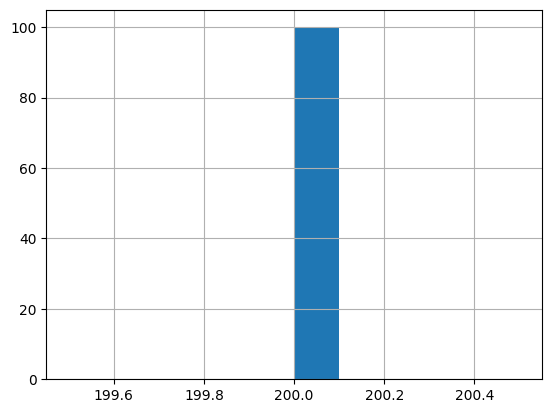

In [127]:
df['requeststatus'].hist()
pyl.show()

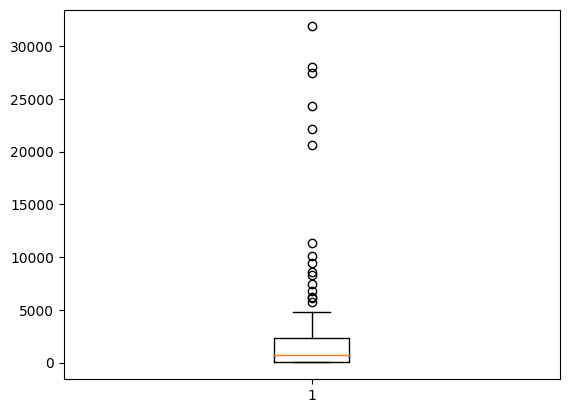

In [143]:
plt.boxplot(df['runTime'])
plt.show()

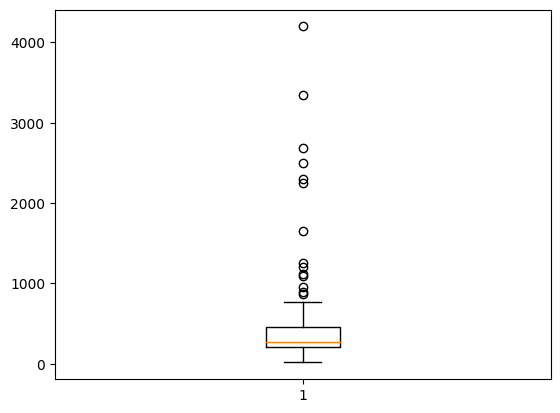

In [145]:
plt.boxplot(df['upvoteCount'])
plt.show()

Text(0.5, 1.0, 'total count of tags')

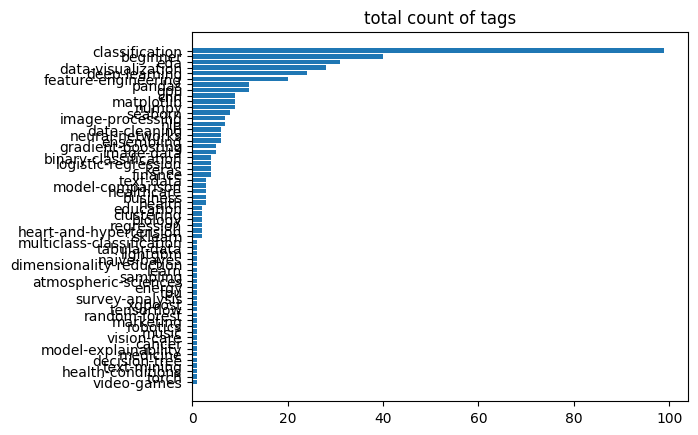

In [136]:
dftemp = pd.DataFrame([], columns=[
                  'height', 'bars'])
inLoop = False
index =0

for column in df:
    #print(column)
    if(inLoop):
        dftemp.loc[index,"bars"] = str(column)
        dftemp.loc[index, "height"] = df[column].value_counts()[1]
        index +=1
    if(column=='tags'):
        inLoop = True
inLoop=False

dftemp = dftemp.sort_values(by=['height'])
plt.barh(y=dftemp.bars, width=dftemp.height)
plt.title('total count of tags')
# y_pos = np.arange(len(bars))

# # Create bars
# plt.barh(y_pos, height)

# # Create names on the x-axis
# plt.yticks(y_pos, bars)

# # Show graphic
# plt.show() 

In [142]:
dftemp = pd.DataFrame([], columns=[
                  'height', 'bars'])
inLoop = False
index =0

for column in df:
    #print(column)
    if(column=='runTime'):
        inLoop=False
    if(inLoop):
        dftemp.loc[index,"bars"] = str(column)
        dftemp.loc[index, "height"] = df[column].value_counts()[1]
        index +=1
    if(column=='content'):
        inLoop = True
inLoop=False

dftemp = dftemp.sort_values(by=['height'])
plt.barh(y=dftemp.bars, width=dftemp.height)
plt.title('total count of tags')

IndexError: index 1 is out of bounds for axis 0 with size 1